In [1]:
#=====================================================================================================
# Author: Ben Grauer
# Purpose: Some basic plotting of the data
#
#=====================================================================================================

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


In [ ]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 12

from datetime import datetime
import time

import math
import scipy
from scipy.stats.stats import pearsonr

from ipywidgets import FloatProgress
from IPython.display import display

# import spacy
import spacy

In [2]:
workDir = 'D:/project/data/kg_avito_demand/'

In [3]:
# Use the helper script to load the data
import helper
dfTrain, dfTest = helper.fn_LoadData(workDir + 'train.csv', workDir + 'test.csv')

Loading Train and Test Files
0:00:31.450570
Adding Stats Features
Total Train Records: 1503424
Total Test Records: 508438
0:01:03.369869
Cleaning data
0:01:06.469580
Loading Image + Text Data
Loading Train Image Stat Files (3-splits)
0:01:41.527285
Loading Test Image Stat Files
0:01:53.067158
Loading Text Stat Files
0:02:23.902400
Merging Image Stat Files
0:02:39.917159
Mergeing Text Stat Files
Finished Loading and Merging Image and Text Files
0:02:44.749760
:-) Train: 1503424  Super: 1503424


In [4]:
dfTrain.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,desc_numNumericWords,desc_numUpperCaseWords,desc_avgImportantWordLength,desc_avgAllWordLength,desc_numSentences,desc_avgWordsPerSentence,desc_avgWordLengthPerSentence,blur_quality,image_whitespace,image_present
0,b912c3c6a6ad,e00f8ff2eaf9,Sverdlovsk region,Ekaterinburg,Personal things,Goods for children and toys,Bed dress,NaN,NaN,Kokobi (cocoon for sleep),...,0,0,6.666667,4.818182,1,6.0,6.666667,good,0.0,1
1,2dac0150717d,39aeb48f0017,Samara Region,Samara,For home and cottages,Furniture and interior,Other,NaN,NaN,Rack for Clothes,...,0,0,6.000000,4.000000,2,2.5,6.000000,good,0.0,1
2,ba83aefab5dc,91e2f88dd6e3,Rostov region,Rostov-na-Donu,Consumer electronics,Audio and video,"Video, DVD and Blu-ray players",NaN,NaN,Philips bluray,...,0,1,4.133333,3.478261,2,7.5,4.116071,good,1.0,1
3,02996f1dd2ea,bf5cccea572d,Tatarstan,Naberezhnye Chelny,Personal things,Goods for children and toys,Car seats,NaN,NaN,Car seat,...,2,0,3.500000,3.375000,1,6.0,3.500000,average,1.0,1
4,7c90be56d2ab,ef50846afc0b,Volgograd region,Volgograd,Transport,Cars,With mileage,VAZ (LADA),2110,"VAZ 2110, 2003",...,0,0,5.666667,3.833333,1,3.0,5.666667,good,0.0,1


In [5]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503424 entries, 0 to 1503423
Data columns (total 80 columns):
item_id                          1503424 non-null object
user_id                          1503424 non-null object
region                           1503424 non-null object
city                             1503424 non-null object
parent_category_name             1503424 non-null object
category_name                    1503424 non-null object
param_1                          1441848 non-null object
param_2                          848882 non-null object
param_3                          640859 non-null object
title                            1503424 non-null object
description                      1503424 non-null object
price                            1418062 non-null float64
item_seq_number                  1503424 non-null int64
activation_date                  1503424 non-null object
user_type                        1503424 non-null object
image                            1

In [6]:
# Things to look at region, city, parent_category_name, category_name
dfTrain['parent_category_name'].unique()

array(['Personal things', 'For home and cottages', 'Consumer electronics',
       'Transport', 'The property', 'Animals', 'Hobbies and Recreation',
       'The services', 'For business'], dtype=object)

## ANALYSIS - Take a look at the spread of the deal probability

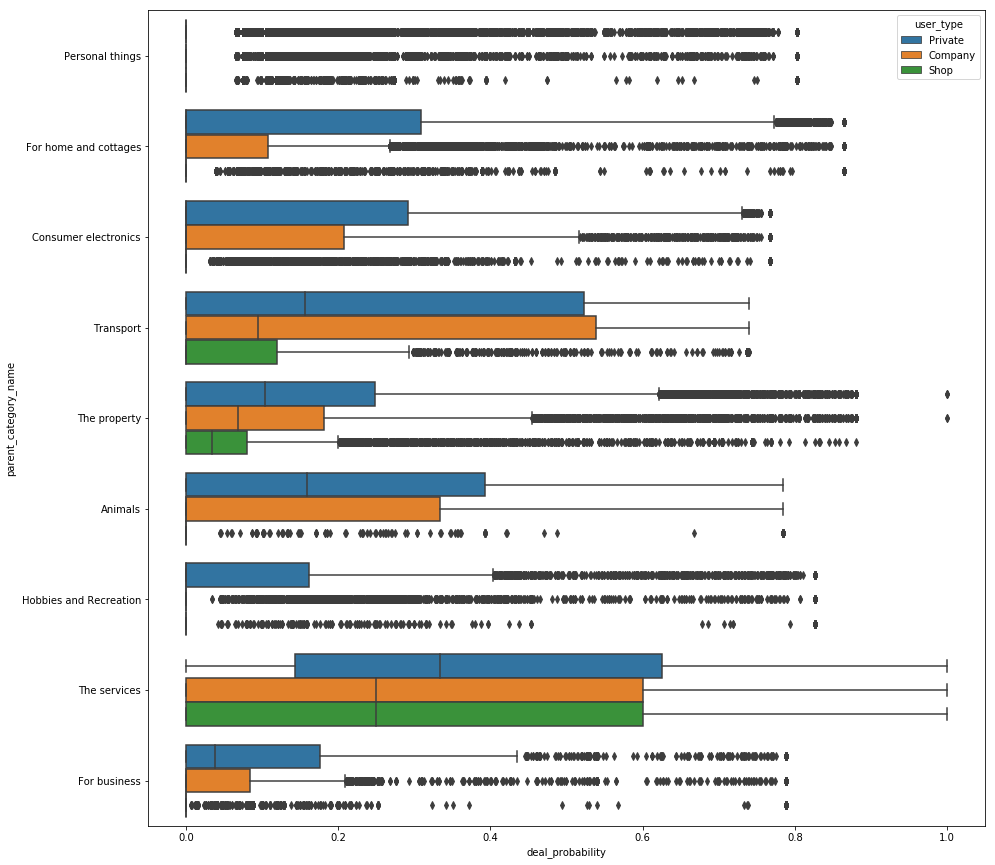

In [7]:
plt.subplots(figsize=(15,15))
ax = sns.boxplot(x='deal_probability', y='parent_category_name', data=dfTrain, orient='h', hue='user_type')

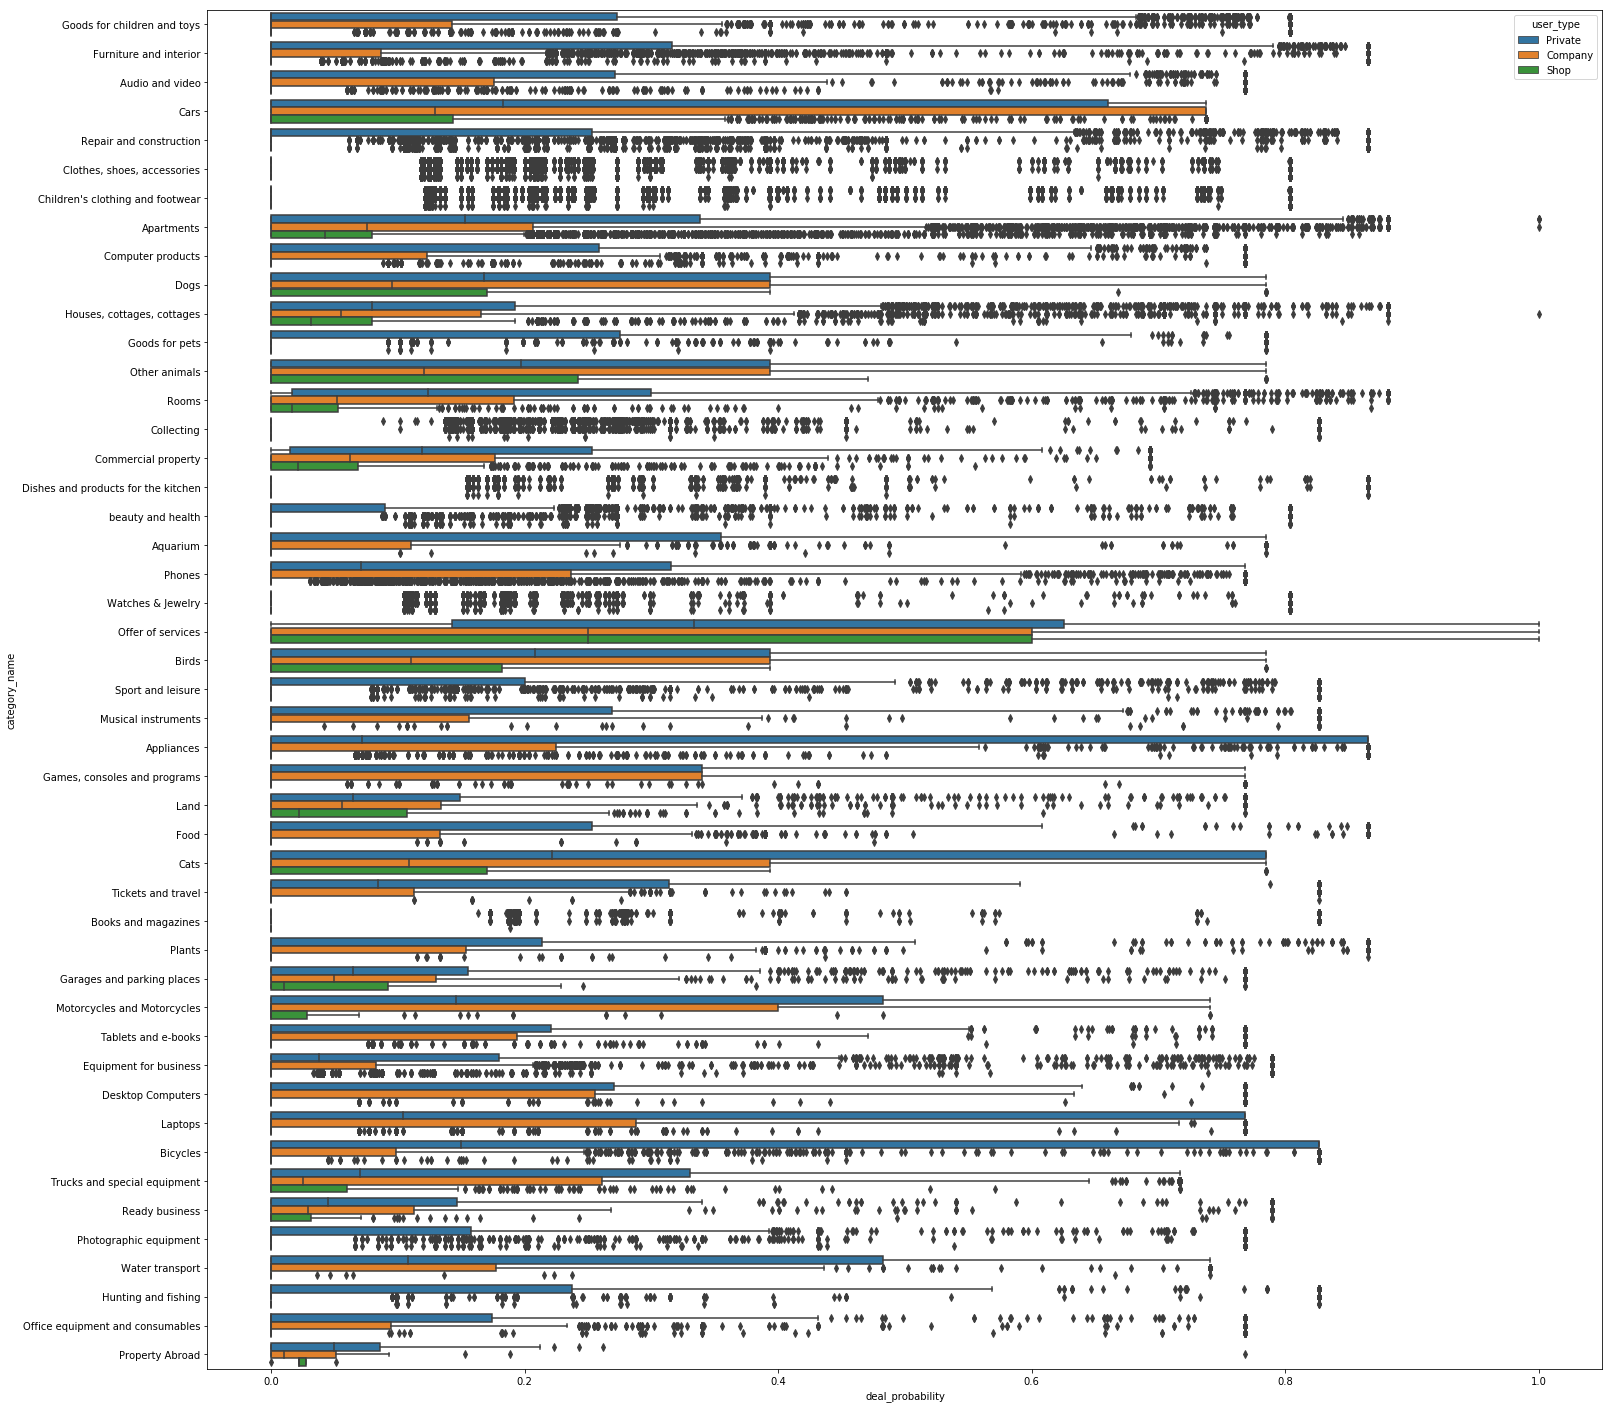

In [8]:
plt.subplots(figsize=(25,25))
ax = sns.boxplot(x='deal_probability', y='category_name', data=dfTrain, orient='h', hue='user_type')

In [12]:
dfTest['category_name'].unique()

array(["Children's clothing and footwear", 'Bicycles', 'Audio and video',
       'Appliances', 'Goods for children and toys',
       'Repair and construction', 'Laptops', 'Phones',
       'Computer products', 'Offer of services',
       'Clothes, shoes, accessories', 'Hunting and fishing',
       'Other animals', 'Books and magazines', 'Watches & Jewelry',
       'Food', 'Office equipment and consumables', 'Goods for pets',
       'Furniture and interior', 'Ready business', 'Cars',
       'Tickets and travel', 'Apartments', 'Cats', 'Musical instruments',
       'Garages and parking places', 'Houses, cottages, cottages',
       'Sport and leisure', 'Motorcycles and Motorcycles', 'Plants',
       'Land', 'Games, consoles and programs', 'Rooms', 'Birds',
       'beauty and health', 'Collecting', 'Photographic equipment',
       'Commercial property', 'Tablets and e-books', 'Desktop Computers',
       'Equipment for business', 'Aquarium',
       'Dishes and products for the kitchen',
     

In [13]:
# Count Plots of category name + parent category name

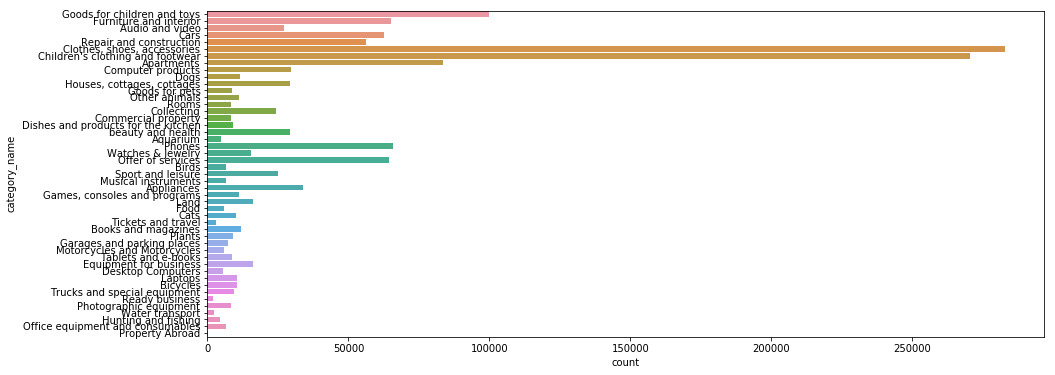

In [14]:
ax = sns.countplot(y='category_name', data=dfTrain, orient='h') #, hue='user_type')

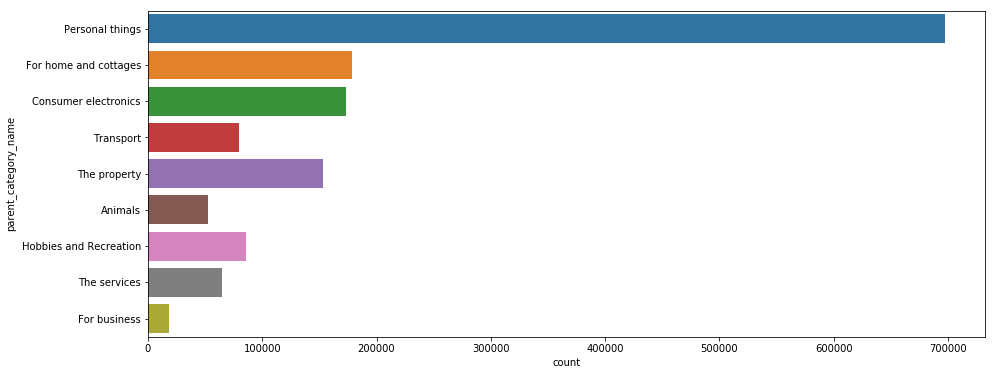

In [15]:
ax = sns.countplot(y='parent_category_name', data=dfTrain, orient='h') #, hue='user_type')

## Analysis - Does a higher sequence number indicate a higher probability?
- Check and see if the item_seq_number has any impace on the mean of the probability.

In [16]:
# Let's look at the correlation between "item_seq_number" and "deal_probability"
pearsonr(dfTrain['item_seq_number'], dfTrain['deal_probability'])

(-0.03574417203102098, 0.0)

In [17]:
from scipy.stats import linregress

min_seq_num = 5

# Now let's look at if we have more than on sequence
x = dfTrain[dfTrain['item_seq_number'] > min_seq_num]['item_seq_number']
y = dfTrain[dfTrain['item_seq_number'] > min_seq_num]['deal_probability']
linregress(x , y)
#pearsonr(x,y)
#dfTrain[dfTrain['item_seq_number'] > 0]['item_seq_number']
#pearsonr(dfTrain['item_seq_number'], dfTrain['deal_probability'])

LinregressResult(slope=-1.3941439405247325e-06, intercept=0.12868939300039914, rvalue=-0.03358901984116863, pvalue=4.133183818649084e-303, stderr=3.745284570857566e-08)

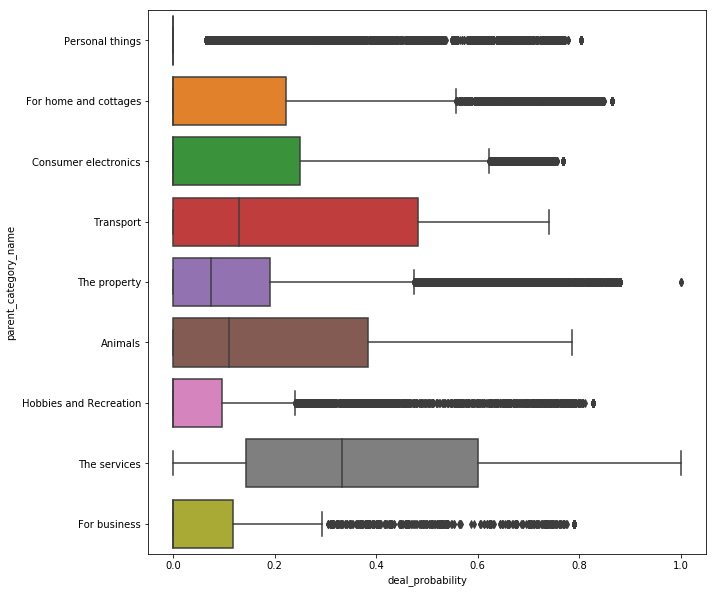

In [18]:
plt.subplots(figsize=(10,10))
ax = sns.boxplot(x='deal_probability', y='parent_category_name', data=dfTrain, orient='h') #, hue='user_type')

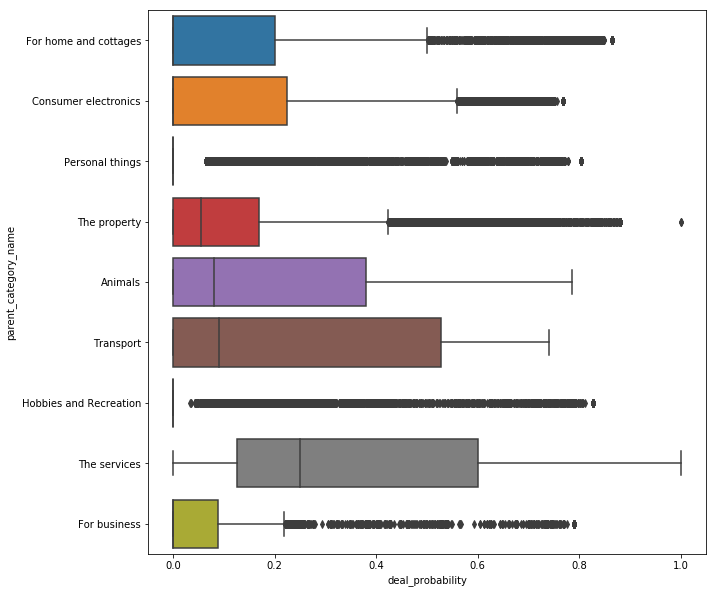

In [19]:
# Let's look at the average probability given buckets of sequnce numbers
plt.subplots(figsize=(10,10))
ax = sns.boxplot(x='deal_probability', y='parent_category_name', data=dfTrain[dfTrain['item_seq_number'] > min_seq_num], orient='h') #, hue='user_type')

Here I wanted to look and see if the number of sequences incresed - if there would be a greater probability.  Hobbies and recreations seems to be the only one.

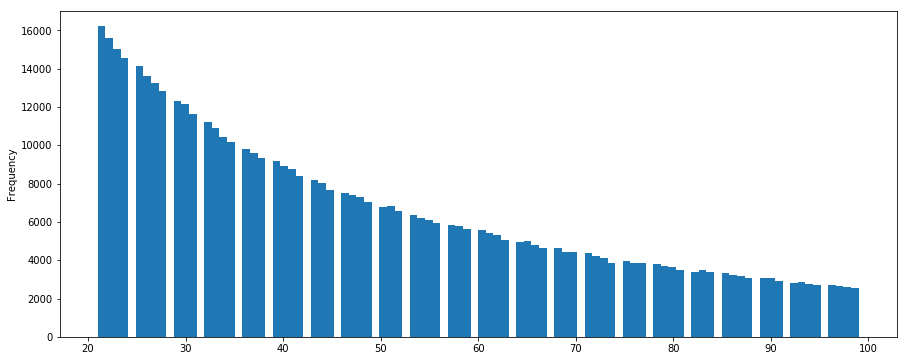

In [20]:
# now I want to look at the distribution of the sequence number
dfTrain[(dfTrain['item_seq_number']<100) & (dfTrain['item_seq_number']>20)]['item_seq_number'].plot(kind='hist', bins=100)

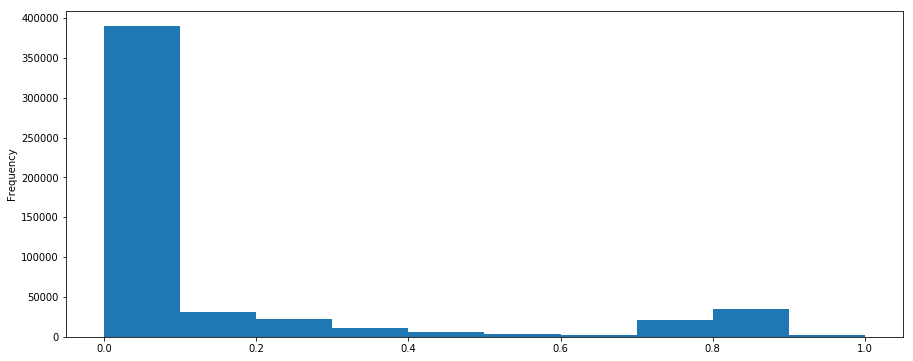

In [21]:
dfTrain[(dfTrain['item_seq_number']<100) & (dfTrain['item_seq_number']>20)]['deal_probability'].plot(kind='hist')

Here it looks like there is still a high distribution at 0.  Not much of a difference if the sequence number 
(which is supposed to be "Ad sequential number for user") makes any difference.

CONCLUSION - A higher sequence number does NOT indicate a higher probability

In [ ]:
## Look at importing Geographic Population - to be turned into a feature - (unfinished)

How about the region or area?  Perhaps we can get information on whether the area is heavily populated or not.

This will kind of define what is urban and what is rural
https://en.wikipedia.org/wiki/Types_of_inhabited_localities_in_Russia

- City: 100,000
- Urban Type settlement proper: 3,000 - 12,000

In [22]:
dfRussianPopulation = pd.read_csv(workDir + 'supp_CityPopulation.tsv', sep='\t')

In [23]:
dfRussianPopulation.head()

,Rank (2017),City/town,Russian,Federal Subject,Federal District,Population(2017 estimate),Population(2010 Census),Change
0,1,Moscow,Москва,Moscow (federal city)[4],Central,"12,380,664","11,503,501",+7.63%
1,2,Saint Petersburg,Санкт-Петербург,Saint Petersburg (federal city)[5],Northwest,"5,281,579","4,879,566",+8.24%
2,3,Novosibirsk,Новосибирск,Novosibirsk Oblast,Siberia,"1,602,915","1,473,754",+8.76%
3,4,Yekaterinburg,Екатеринбург,Sverdlovsk Oblast,Ural,"1,455,514","1,349,772",+7.83%
4,5,Nizhny Novgorod,Нижний Новгород,Nizhny Novgorod Oblast,Volga,"1,261,666","1,250,619",+0.88%


In [24]:
dfRussianPopulation.tail()

,Rank (2017),City/town,Russian,Federal Subject,Federal District,Population(2017 estimate),Population(2010 Census),Change
313,314,Severomorsk,Североморск,Murmansk Oblast,Northwest,"51,209","50,060",+2.30%
314,315,Borovichi,Боровичи,Novgorod Oblast,Northwest,"50,896","53,690",−5.20%
315,316,Roslavl,Рославль,Smolensk Oblast,Central,"50,870","54,900",−7.34%
316,317,Snezhinsk,Снежинск,Chelyabinsk Oblast,Ural,"50,759","48,810",+3.99%
317,318,Nazarovo,Назарово,Krasnoyarsk Krai,Siberia,"50,397","52,817",−4.58%


In [25]:
len(dfTrain['city'].unique())
# 1,699

1699

In [26]:
len(dfTest['city'].unique())

1612

In [27]:
# Translated
dfUnqCities = pd.DataFrame(dfTrain['city'].unique(), columns=['city'])
# Grab the original
dfUnqCitiesOrig = pd.DataFrame(dfTrain['city_orig'].unique(), columns=['city_orig'])

In [28]:
dfUnqCities.head()

,city
0,Ekaterinburg
1,Samara
2,Rostov-na-Donu
3,Naberezhnye Chelny
4,Volgograd


In [29]:
mrg1 = pd.merge(dfUnqCities, dfRussianPopulation, how='left', left_on='city', right_on='City/town')

In [30]:
# So 1,539 are null out of 1,699 - pretty bad
mrg1['City/town'].isnull().sum()

1539

In [31]:
mrg1.sort_values(by=['Rank (2017)'], ascending=[True]).head(30)

,city,Rank (2017),City/town,Russian,Federal Subject,Federal District,Population(2017 estimate),Population(2010 Census),Change
1188,Moscow,1.0,Moscow,Москва,Moscow (federal city)[4],Central,"12,380,664","11,503,501",+7.63%
14,Novosibirsk,3.0,Novosibirsk,Новосибирск,Novosibirsk Oblast,Siberia,"1,602,915","1,473,754",+8.76%
6,Nizhny Novgorod,5.0,Nizhny Novgorod,Нижний Новгород,Nizhny Novgorod Oblast,Volga,"1,261,666","1,250,619",+0.88%
12,Kazan,6.0,Kazan,Казань,Republic of Tatarstan,Volga,"1,231,878","1,143,535",+7.73%
27,Chelyabinsk,7.0,Chelyabinsk,Челябинск,Chelyabinsk Oblast,Ural,"1,198,858","1,130,132",+6.08%
48,Omsk,8.0,Omsk,Омск,Omsk Oblast,Siberia,"1,178,391","1,154,116",+2.10%
1,Samara,9.0,Samara,Самара,Samara Oblast,Volga,"1,169,719","1,164,685",+0.43%
53,Ufa,11.0,Ufa,Уфа,Republic of Bashkortostan,Volga,"1,115,560","1,062,319",+5.01%
29,Krasnoyarsk,12.0,Krasnoyarsk,Красноярск,Krasnoyarsk Krai,Siberia,"1,082,933","973,826",+11.20%
19,Voronezh,14.0,Voronezh,Воронеж,Voronezh Oblast,Central,"1,039,801","889,680",+16.87%


In [33]:
mrg2 = pd.merge(dfUnqCitiesOrig, dfRussianPopulation, how='left', left_on='city_orig', right_on='Russian')
# So 1,556 are null out of 1,699 - even worse 
mrg2['City/town'].isnull().sum()

1556

In [34]:
mrg2.sort_values(by=['Rank (2017)'], ascending=[True]).head(50)

,city_orig,Rank (2017),City/town,Russian,Federal Subject,Federal District,Population(2017 estimate),Population(2010 Census),Change
14,Новосибирск,3.0,Novosibirsk,Новосибирск,Novosibirsk Oblast,Siberia,"1,602,915","1,473,754",+8.76%
0,Екатеринбург,4.0,Yekaterinburg,Екатеринбург,Sverdlovsk Oblast,Ural,"1,455,514","1,349,772",+7.83%
6,Нижний Новгород,5.0,Nizhny Novgorod,Нижний Новгород,Nizhny Novgorod Oblast,Volga,"1,261,666","1,250,619",+0.88%
12,Казань,6.0,Kazan,Казань,Republic of Tatarstan,Volga,"1,231,878","1,143,535",+7.73%
27,Челябинск,7.0,Chelyabinsk,Челябинск,Chelyabinsk Oblast,Ural,"1,198,858","1,130,132",+6.08%
48,Омск,8.0,Omsk,Омск,Omsk Oblast,Siberia,"1,178,391","1,154,116",+2.10%
1,Самара,9.0,Samara,Самара,Samara Oblast,Volga,"1,169,719","1,164,685",+0.43%
2,Ростов-на-Дону,10.0,Rostov-on-Don,Ростов-на-Дону,Rostov Oblast,South[6],"1,125,299","1,089,261",+3.31%
53,Уфа,11.0,Ufa,Уфа,Republic of Bashkortostan,Volga,"1,115,560","1,062,319",+5.01%
29,Красноярск,12.0,Krasnoyarsk,Красноярск,Krasnoyarsk Krai,Siberia,"1,082,933","973,826",+11.20%
